In [1]:
import phasenet.zernike as Z
import phasenet.psf as P
from phasenet.phantoms import *

# Zernike

In [2]:
print(Z.Zernike(5, order='noll'))
print(Z.Zernike(3, order='ansi'))
print(Z.Zernike((2,-2)))
print(Z.Zernike('oblique astigmatism'))

Zernike(n=2, m=-2, noll= 5, ansi= 3, name='oblique astigmatism')
Zernike(n=2, m=-2, noll= 5, ansi= 3, name='oblique astigmatism')
Zernike(n=2, m=-2, noll= 5, ansi= 3, name='oblique astigmatism')
Zernike(n=2, m=-2, noll= 5, ansi= 3, name='oblique astigmatism')


In [3]:
for j in range(15):
    print(Z.Zernike(j, order='ansi'))

Zernike(n=0, m= 0, noll= 1, ansi= 0, name='piston')
Zernike(n=1, m=-1, noll= 3, ansi= 1, name='tilt')
Zernike(n=1, m= 1, noll= 2, ansi= 2, name='tip')
Zernike(n=2, m=-2, noll= 5, ansi= 3, name='oblique astigmatism')
Zernike(n=2, m= 0, noll= 4, ansi= 4, name='defocus')
Zernike(n=2, m= 2, noll= 6, ansi= 5, name='vertical astigmatism')
Zernike(n=3, m=-3, noll= 9, ansi= 6, name='vertical trefoil')
Zernike(n=3, m=-1, noll= 7, ansi= 7, name='vertical coma')
Zernike(n=3, m= 1, noll= 8, ansi= 8, name='horizontal coma')
Zernike(n=3, m= 3, noll=10, ansi= 9, name='oblique trefoil')
Zernike(n=4, m=-4, noll=15, ansi=10, name='oblique quadrafoil')
Zernike(n=4, m=-2, noll=13, ansi=11, name='oblique secondary astigmatism')
Zernike(n=4, m= 0, noll=11, ansi=12, name='primary spherical')
Zernike(n=4, m= 2, noll=12, ansi=13, name='vertical secondary astigmatism')
Zernike(n=4, m= 4, noll=14, ansi=14, name='vertical quadrafoil')


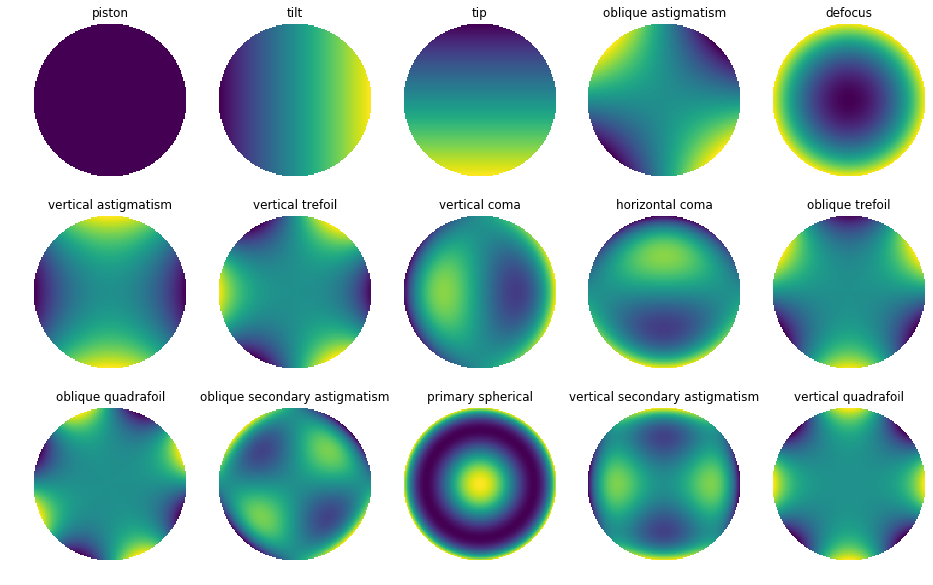

In [4]:
fig, ax = plt.subplots(3,5, figsize=(16,10))
for i,a in enumerate(ax.ravel()):
    z = Z.Zernike(i, order='ansi')
    w = z.polynomial(128)
    a.imshow(w)
    a.set_title(z.name)
    a.axis('off')
None;

## ZernikeWavefront

(0.30488291612961294, 0.846972842840398, 0.0020894171026681896, 0, 0.2598775573162626)
(0.30488291612961294, 0.0020894171026681896, 0.846972842840398, 0.2598775573162626)


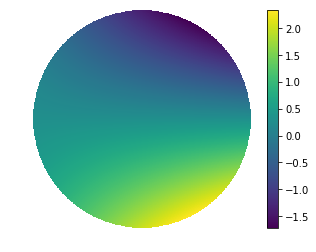

In [5]:
f = Z.ZernikeWavefront(np.random.uniform(-1,1,4), order='ansi')
f.zernikes

print(f.amplitudes_noll)
print(f.amplitudes_ansi)

plt.imshow(f.polynomial(512)); plt.colorbar(); plt.axis('off');

In [6]:
f = Z.random_zernike_wavefront([1,1,1], order='ansi')
print(f.amplitudes_requested, f.amplitudes_ansi)

f = Z.random_zernike_wavefront([0,0,(1,2)], order='ansi')
print(f.amplitudes_requested, f.amplitudes_ansi)

f = Z.random_zernike_wavefront({'defocus':(1,2), (3,-3):5})
print(f.amplitudes_requested, f.amplitudes_ansi)

(0.9339404615361251, 0.8024099553037607, -0.5161930145623161) (0.9339404615361251, 0.8024099553037607, -0.5161930145623161)
(0.0, 0.0, 1.5888165749529786) (0.0, 0.0, 1.5888165749529786)
(1.039792095468488, 2.3648270282895947) (0, 0, 0, 0, 1.039792095468488, 0, 2.3648270282895947)


# PSF

In [7]:
N = 64*1
dx = .1

psf = P.PsfGenerator3D(psf_shape=(N,)*3, units=(dx,)*3, na_detection=1.1, lam_detection=.5, n=1.33)

/Users/dsaha/Codes/phase_net_code/phasenet/psf.py:46: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(1. * self.n ** 2 - KR3 ** 2 * lam_detection ** 2)


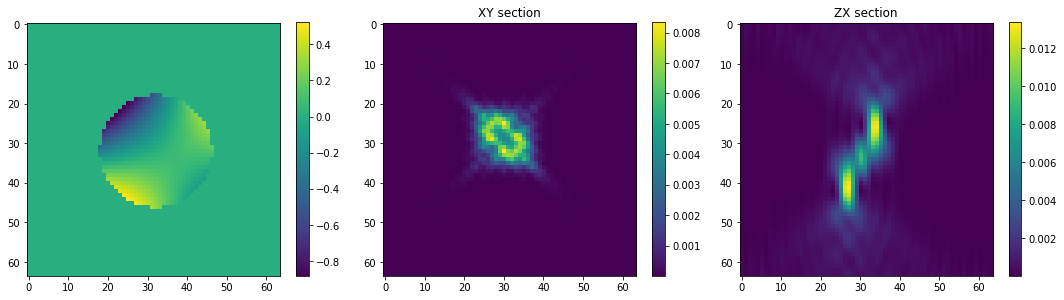

In [8]:
wf = Z.ZernikeWavefront(np.random.uniform(-0.2,0.2,5), order='ansi')
wf.zernikes

plt.figure(figsize=(15,4))
phase = wf.phase(psf.krho, psf.kphi, normed=True, outside=None)
phase = np.fft.fftshift(phase)
plt.subplot(131); plt.imshow(phase); plt.colorbar()

h1 = psf.incoherent_psf(wf, normed=True)
plt.subplot(132); plt.imshow(h1[N//2]);   plt.title('XY section'); plt.colorbar()
plt.subplot(133); plt.imshow(h1[:,N//2]); plt.title('ZX section'); plt.colorbar()
plt.tight_layout()
None;

### Steps for generating aberrated PSF

In [9]:
# STEP 1 : Define a PSFGenerator object which encapsulates the microscope parameters
psf = P.PsfGenerator3D(psf_shape=(64,)*3, units=(dx,)*3, na_detection=1.1, lam_detection=.5, n=1.33)
# STEP 2 : Define a wavefront as a ZernikeWavefront object
wf = Z.ZernikeWavefront({5:0.1}, order='ansi')
# STEP 3 : Generate the PSF
h1 = psf.incoherent_psf(wf, normed=True)

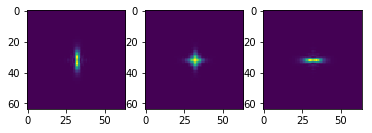

In [10]:
plt.subplot(1,3,1)
plt.imshow(h1[28])
plt.subplot(1,3,2)
plt.imshow(h1[32])
plt.subplot(1,3,3)
plt.imshow(h1[36])
None;